## Lending Club Case Study

### Problem Statement : 
* Driving factors or attributes for lending club to understand loan default 

In [1]:
# Importing the necessary modules for data anaylysing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action="ignore")

# Data Analysis

* Quantum of Data
* Shape (Rows and Columns)
* Data Distribution

In [2]:
# import the csv files to load the data for analysing
df = pd.read_csv("loan.csv")

In [3]:
# check the shape of data to see the amount of data we are going to dealt with.
df.shape

(39717, 111)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
# Describe the data to check the data distribution in a glimpse 
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


## Data Cleaning

* Identify columns having null values entirely 
* Identify columns that may not be suitable for our analysis given our problem statement
* Remove these unnecessary data 

In [6]:
# Checking null data and realsing that there are certain columns which are entirely having null values and not required for
# our analysis
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [7]:
# Sort the null values columns in decreasing order just to feel the quantum of it 
df.isna().sum().sort_values(ascending=False).head(60)

verification_status_joint         39717
annual_inc_joint                  39717
mo_sin_old_rev_tl_op              39717
mo_sin_old_il_acct                39717
bc_util                           39717
bc_open_to_buy                    39717
avg_cur_bal                       39717
acc_open_past_24mths              39717
inq_last_12m                      39717
total_cu_tl                       39717
inq_fi                            39717
total_rev_hi_lim                  39717
all_util                          39717
max_bal_bc                        39717
open_rv_24m                       39717
open_rv_12m                       39717
il_util                           39717
total_bal_il                      39717
mths_since_rcnt_il                39717
open_il_24m                       39717
open_il_12m                       39717
open_il_6m                        39717
open_acc_6m                       39717
tot_cur_bal                       39717
tot_coll_amt                      39717


In [8]:
# Drop all the columns having each value as NaN values 
df = df.dropna(axis=1, how='all')

In [9]:
# just checking how much columns get reduced after removing the columns with null values (Till now we have removed columns 
# having all values as NaN )
len(df.columns)

57

In [10]:
# Check again for NaN values 
df.isna().sum().sort_values(ascending=False).head(60)

# There are still some columns having null values we can leave it now  for filling any values
# Let's see if at all they are valid for our senarios

next_pymnt_d                  38577
mths_since_last_record        36931
mths_since_last_delinq        25682
desc                          12940
emp_title                      2459
emp_length                     1075
pub_rec_bankruptcies            697
last_pymnt_d                     71
chargeoff_within_12_mths         56
collections_12_mths_ex_med       56
revol_util                       50
tax_liens                        39
title                            11
last_credit_pull_d                2
home_ownership                    0
int_rate                          0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
term                              0
last_pymnt_amnt                   0
initial_list_status               0
funded_amnt_inv             

In [11]:
# There are few more having NaN where majority of data is having NaN Values say more than 80%. Let's drop that as well
# next_pymnt_d, mths_since_last_record, mths_since_last_delinq, desc(30 % is vacant I guess we can drop this column as well as 
# not because of 30% but because we do not need for our analysis)

df = df.drop(columns=['next_pymnt_d', 'mths_since_last_record', 'mths_since_last_delinq', 'desc'])

In [12]:
# Further to what where we have removed the columns with some null values now let's focus columns though having data but not required 
# for our analysis

df = df.drop(columns=['delinq_2yrs','earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp','out_prncp_inv', 'total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee', 'recoveries','collection_recovery_fee','last_pymnt_d' ,'last_pymnt_amnt', 'last_credit_pull_d', 'application_type'])
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,addr_state,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,AZ,27.65,f,0.0,1,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,GA,1.00,f,0.0,1,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,IL,8.72,f,0.0,1,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,CA,20.00,f,0.0,1,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,OR,17.94,f,0.0,1,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,CO,11.33,f,NaN,1,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NC,6.40,f,NaN,1,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,MA,2.30,f,NaN,1,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,MD,3.72,f,NaN,1,0,NaN,0,NaN,NaN


In [13]:
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [14]:
# We don not need the loan_status data having value as "Current" 
# 1. Loan is already passed to the customer and they are already continuing with their loans and in process of paying them.
# Hence removing all the rowas having loan_status as "Current".

df = df[~(df['loan_status']== 'Current')]
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,addr_state,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,AZ,27.65,f,0.0,1,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,GA,1.00,f,0.0,1,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,IL,8.72,f,0.0,1,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,CA,20.00,f,0.0,1,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,AZ,11.20,f,0.0,1,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,CO,11.33,f,NaN,1,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NC,6.40,f,NaN,1,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,MA,2.30,f,NaN,1,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,MD,3.72,f,NaN,1,0,NaN,0,NaN,NaN


In [15]:
# Reset the DF index
df.reset_index()

,index,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,addr_state,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,...,AZ,27.65,f,0.0,1,0,0.0,0,0.0,0.0
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,...,GA,1.00,f,0.0,1,0,0.0,0,0.0,0.0
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,...,IL,8.72,f,0.0,1,0,0.0,0,0.0,0.0
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,...,CA,20.00,f,0.0,1,0,0.0,0,0.0,0.0
4,5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,...,AZ,11.20,f,0.0,1,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38572,39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,...,CO,11.33,f,NaN,1,0,NaN,0,NaN,NaN
38573,39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,...,NC,6.40,f,NaN,1,0,NaN,0,NaN,NaN
38574,39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,...,MA,2.30,f,NaN,1,0,NaN,0,NaN,NaN
38575,39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,...,MD,3.72,f,NaN,1,0,NaN,0,NaN,NaN


In [16]:
df.isna().sum().sort_values(ascending=False)

emp_title                     2386
emp_length                    1033
pub_rec_bankruptcies           697
chargeoff_within_12_mths        56
collections_12_mths_ex_med      56
tax_liens                       39
title                           11
purpose                          0
zip_code                         0
addr_state                       0
initial_list_status              0
dti                              0
pymnt_plan                       0
policy_code                      0
acc_now_delinq                   0
delinq_amnt                      0
url                              0
id                               0
member_id                        0
issue_d                          0
verification_status              0
annual_inc                       0
home_ownership                   0
sub_grade                        0
grade                            0
installment                      0
int_rate                         0
term                             0
funded_amnt_inv     

In [17]:
# Checking one by one the remaining attrbitues with their values to understand will it impact the analysis for default customer
# dt, id, emp_title, 'member_id', pub_rec_bankruptcies, chargeoff_within_12_mths, collections_12_mths_ex_med, tax_liens, addr_state
# pymnt_plan (all rows have same values) 
# url it does not make any sense to keep string urls for analysis
# chargeoff_within_12_mths, collections_12_mths_ex_med, tax_liens, delinq_amnt all have same value as 0.0

remove_cols= ['id', 'emp_title', 'member_id', 'chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'tax_liens',
              'pymnt_plan', 'delinq_amnt', 'url' ]

df['pub_rec_bankruptcies'].value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [18]:
df = df.drop(columns=remove_cols)

In [19]:
df 

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,loan_status,purpose,title,zip_code,addr_state,dti,initial_list_status,policy_code,acc_now_delinq,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,Fully Paid,credit_card,Computer,860xx,AZ,27.65,f,1,0,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,Charged Off,car,bike,309xx,GA,1.00,f,1,0,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,Fully Paid,small_business,real estate business,606xx,IL,8.72,f,1,0,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,Fully Paid,other,personel,917xx,CA,20.00,f,1,0,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,...,Fully Paid,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,f,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,4 years,MORTGAGE,...,Fully Paid,home_improvement,Home Improvement,802xx,CO,11.33,f,1,0,NaN
39713,8500,8500,875.0,36 months,10.28%,275.38,C,C1,3 years,RENT,...,Fully Paid,credit_card,Retiring credit card debt,274xx,NC,6.40,f,1,0,NaN
39714,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,< 1 year,MORTGAGE,...,Fully Paid,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,f,1,0,NaN
39715,5000,5000,650.0,36 months,7.43%,155.38,A,A2,< 1 year,MORTGAGE,...,Fully Paid,other,JAL Loan,208xx,MD,3.72,f,1,0,NaN


In [20]:
df.dtypes.sort_values()

loan_amnt                 int64
funded_amnt               int64
policy_code               int64
acc_now_delinq            int64
dti                     float64
annual_inc              float64
pub_rec_bankruptcies    float64
installment             float64
funded_amnt_inv         float64
sub_grade                object
emp_length               object
home_ownership           object
int_rate                 object
issue_d                  object
loan_status              object
purpose                  object
title                    object
zip_code                 object
addr_state               object
term                     object
initial_list_status      object
grade                    object
verification_status      object
dtype: object

In [21]:
# The home ownership would be good categorical value to know see how loan_status would vary with this
df['home_ownership']

0            RENT
1            RENT
2            RENT
3            RENT
5            RENT
           ...   
39712    MORTGAGE
39713        RENT
39714    MORTGAGE
39715    MORTGAGE
39716         OWN
Name: home_ownership, Length: 38577, dtype: object

In [22]:
# Similarly, the funded amount would be a key decision maker for loan_status
df['funded_amnt']

0         5000
1         2500
2         2400
3        10000
5         5000
         ...  
39712     2500
39713     8500
39714     5000
39715     5000
39716     7500
Name: funded_amnt, Length: 38577, dtype: int64

In [23]:
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [39]:
df['int_rate'] = df['int_rate'].apply(lambda x: float(x.replace("%", "")))

In [40]:
df.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
zip_code                 object
addr_state               object
dti                     float64
initial_list_status      object
policy_code               int64
acc_now_delinq            int64
pub_rec_bankruptcies    float64
dtype: object

In [45]:
print(df['policy_code'].value_counts())
print(df['acc_now_delinq'].value_counts())

1    38577
Name: policy_code, dtype: int64
0    38577
Name: acc_now_delinq, dtype: int64


In [46]:
# Further Removing
# policy_code since all rows have same values as 1 
# acc_now_delinq remove this column since all values are 0

df.drop(columns=['policy_code', 'acc_now_delinq'])

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,initial_list_status,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,f,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,f,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,f,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,f,0.0
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,...,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,f,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36 months,8.07,78.42,A,A4,4 years,MORTGAGE,...,Not Verified,Jul-07,Fully Paid,home_improvement,Home Improvement,802xx,CO,11.33,f,NaN
39713,8500,8500,875.0,36 months,10.28,275.38,C,C1,3 years,RENT,...,Not Verified,Jul-07,Fully Paid,credit_card,Retiring credit card debt,274xx,NC,6.40,f,NaN
39714,5000,5000,1325.0,36 months,8.07,156.84,A,A4,< 1 year,MORTGAGE,...,Not Verified,Jul-07,Fully Paid,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,f,NaN
39715,5000,5000,650.0,36 months,7.43,155.38,A,A2,< 1 year,MORTGAGE,...,Not Verified,Jul-07,Fully Paid,other,JAL Loan,208xx,MD,3.72,f,NaN


## Univariate Analysis

<AxesSubplot:xlabel='loan_status', ylabel='Count'>

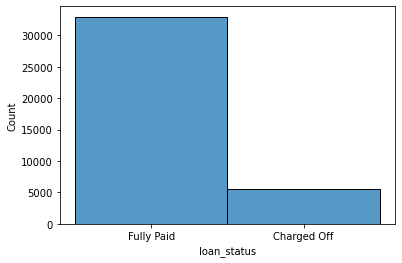

In [25]:
sns.histplot(df['loan_status'])

<AxesSubplot:ylabel='Density'>

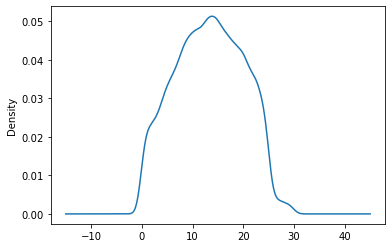

In [26]:
df['dti'].plot(kind='kde')

In [27]:
df['term'].value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

<AxesSubplot:xlabel='installment', ylabel='Count'>

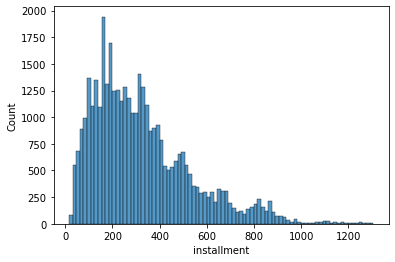

In [28]:
sns.histplot(df['installment'])

<AxesSubplot:xlabel='installment'>

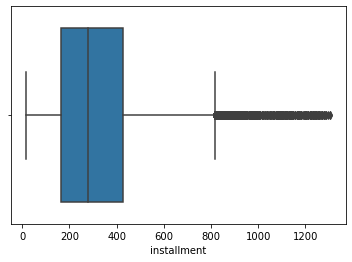

In [30]:
sns.boxplot(df['installment'])

<AxesSubplot:xlabel='int_rate', ylabel='Count'>

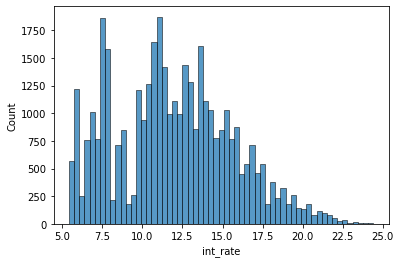

In [38]:
sns.histplot(df['int_rate'].apply(lambda x: float(x.replace("%", ""))))

In [37]:
df['int_rate'].dtypes

dtype('O')

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

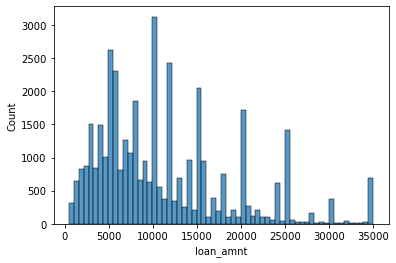

In [46]:
sns.histplot(df['loan_amnt'])

<AxesSubplot:xlabel='issue_d', ylabel='Count'>

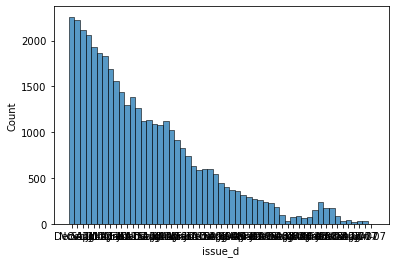

In [51]:
sns.histplot(df['issue_d'])

<AxesSubplot:xlabel='term', ylabel='Count'>

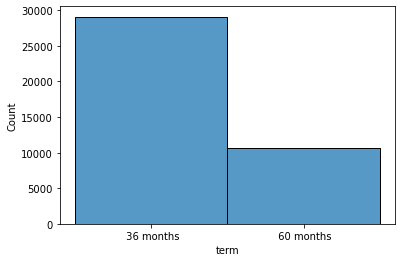

In [55]:
sns.histplot(df['term'])

<AxesSubplot:xlabel='home_ownership', ylabel='Count'>

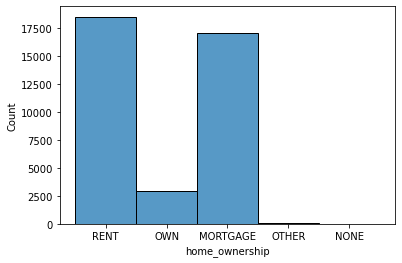

In [88]:
sns.histplot(df['home_ownership'])

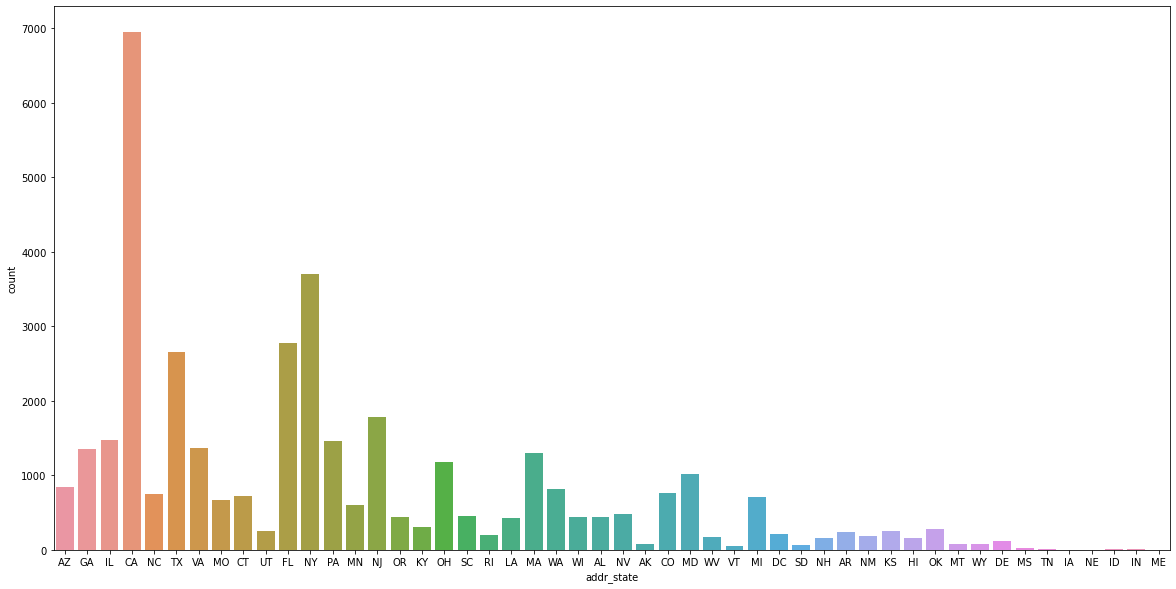

In [50]:
plt.figure(figsize=(20,10))
sns.countplot(x="addr_state", data=df)
plt.show()

In [ ]:
sns.countplot(x="purpose", data=df)

## Bivariate Analysis

<AxesSubplot:xlabel='loan_status', ylabel='installment'>

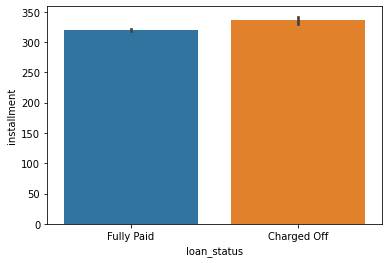

In [89]:
sns.barplot(x=df['loan_status'], y=df['installment'])

# The Barplot indicates that person having installment amount more than 300 tends to default

<AxesSubplot:xlabel='loan_status', ylabel='term'>

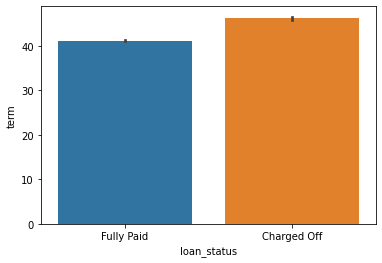

In [90]:
sns.barplot(x=df['loan_status'], y=df['term'].apply(lambda x: int(x.replace("months", ""))))

# The Barplot indicates that person having term more than 40 months tends to default

<AxesSubplot:xlabel='loan_status', ylabel='funded_amnt'>

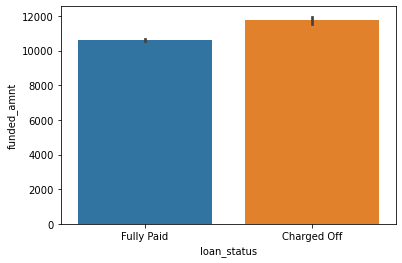

In [74]:
sns.barplot(x=df['loan_status'], y=df['funded_amnt'])


# Whenver the funded_amnt is more than 10k the customer tends to default

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

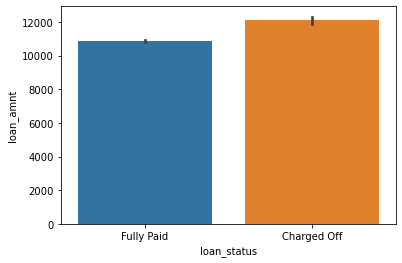

In [75]:
sns.barplot(x=df['loan_status'], y=df['loan_amnt'])

# Whenver the loan_amnt is more than 10-11k k the customer tends to default, Beware if customer is asking for loan more than 10K

<AxesSubplot:xlabel='loan_status', ylabel='funded_amnt_inv'>

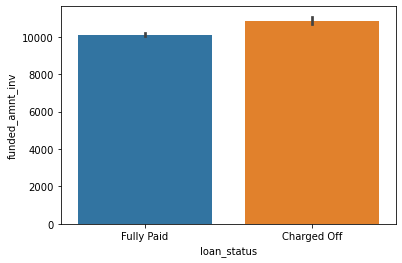

In [76]:
sns.barplot(x=df['loan_status'], y=df['funded_amnt_inv'])

# When funded amount by investor is more than 10k the customers shows some pattern of default

<AxesSubplot:xlabel='loan_status', ylabel='annual_inc'>

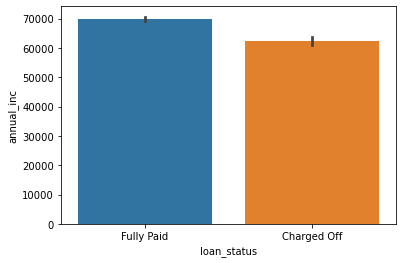

In [82]:
sns.barplot(x=df['loan_status'], y=df['annual_inc'])

# Customer having an annual income more than 60000 tends to default less

<AxesSubplot:xlabel='loan_status', ylabel='dti'>

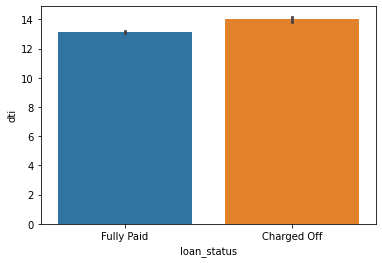

In [83]:
sns.barplot(x=df['loan_status'], y=df['dti'])

# DTI ratio more than 13 tends to default more

<AxesSubplot:xlabel='loan_status', ylabel='count'>

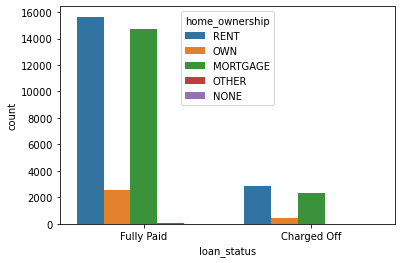

In [77]:
sns.countplot(df['loan_status'], hue=df["home_ownership"])

# Rented owners tend to default more

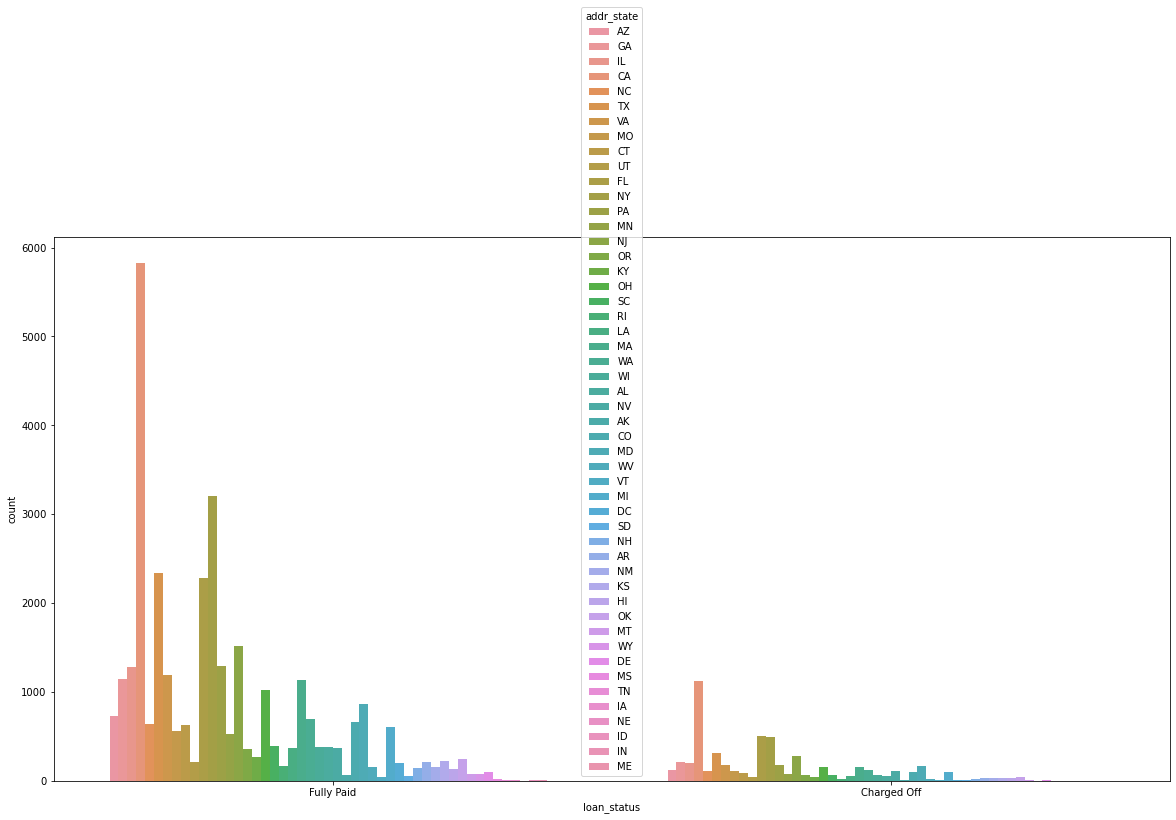

In [79]:
plt.figure(figsize=(20,10))
sns.countplot(df['loan_status'], hue=df["addr_state"])
plt.show()
# State Arizona have both Fully Paid and Defaulters both

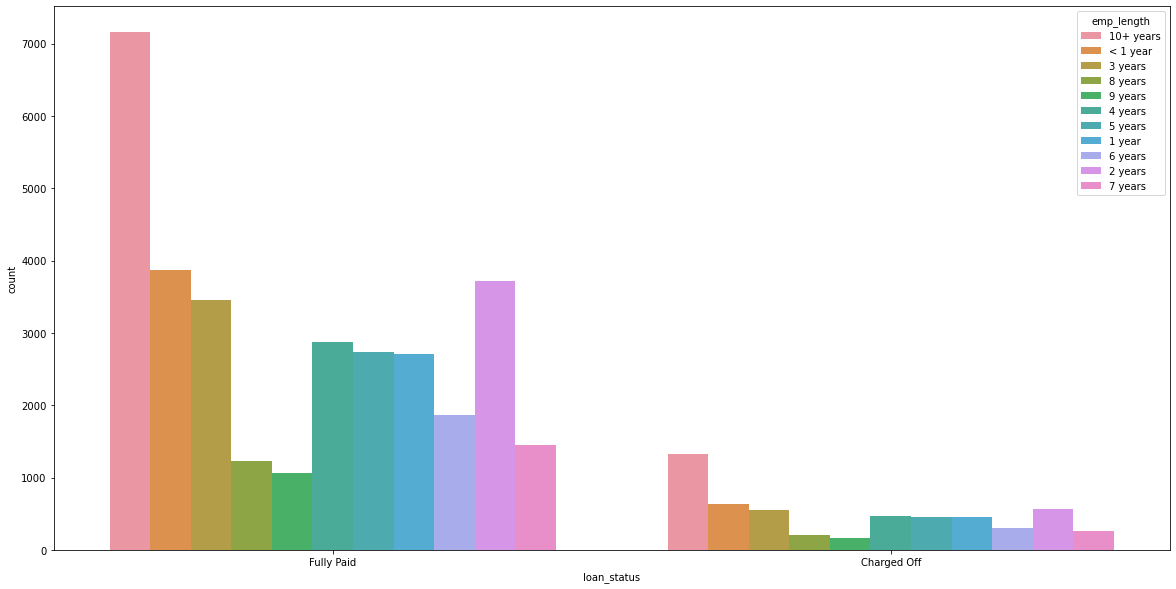

In [80]:
plt.figure(figsize=(20,10))
sns.countplot(df['loan_status'], hue=df["emp_length"])
plt.show()
# Customers having 10+ years of emp_length tends to default

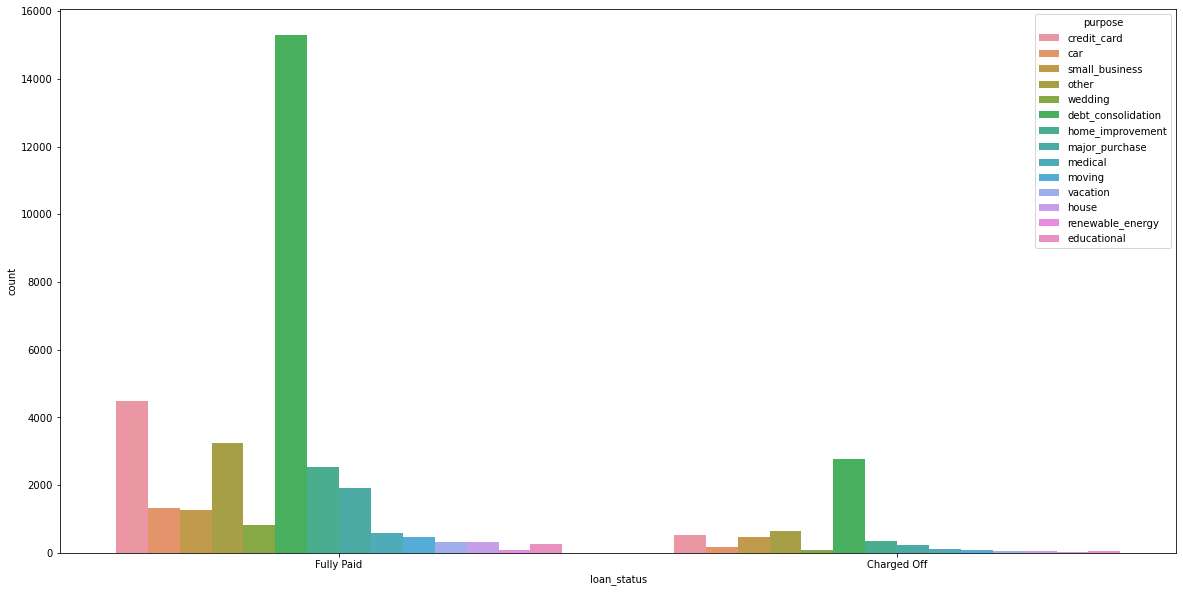

In [53]:
plt.figure(figsize=(20,10))
sns.countplot(df['loan_status'], hue=df["purpose"])
plt.show()

# Loan taken for HomeImprovement tends to default more than others

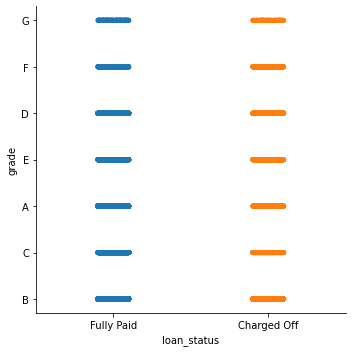

In [67]:
sns.catplot(x="loan_status", y="grade", data=df[['loan_status', 'grade']])

<AxesSubplot:xlabel='loan_status', ylabel='Count'>

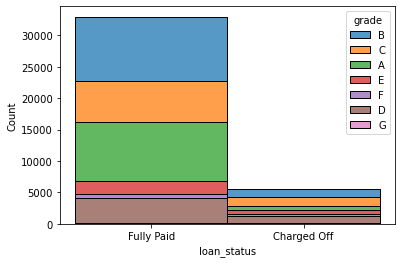

In [71]:
sns.histplot(binwidth=0.8, x="loan_status", hue="grade", data=df, stat="count", multiple="stack")

In [72]:
df.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
zip_code                 object
addr_state               object
dti                     float64
initial_list_status      object
policy_code               int64
acc_now_delinq            int64
pub_rec_bankruptcies    float64
dtype: object

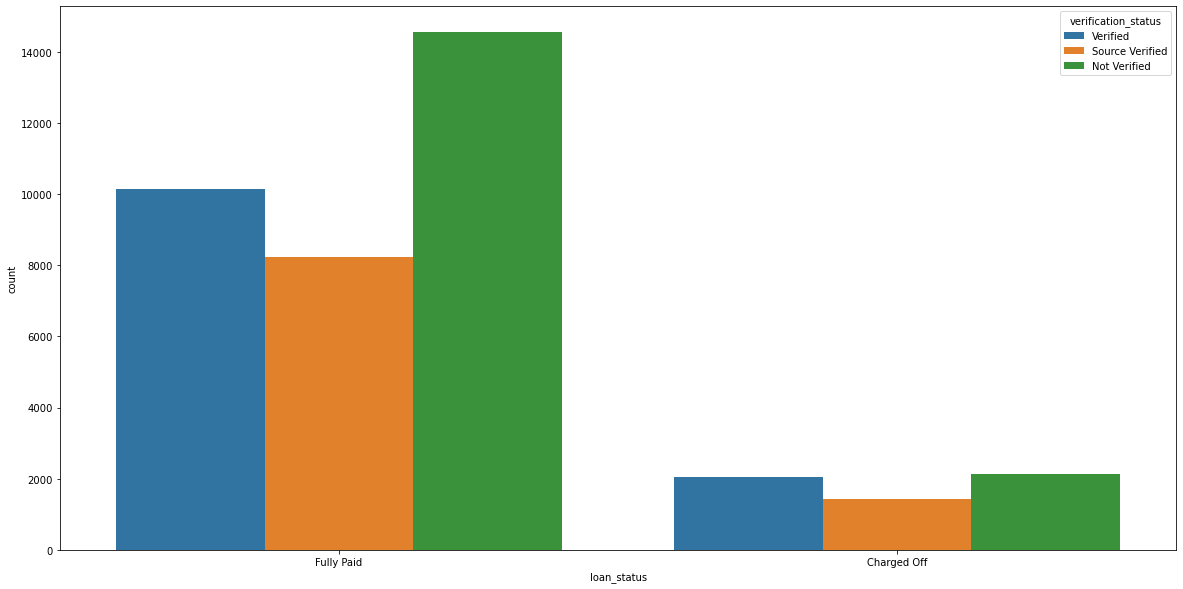

In [81]:
plt.figure(figsize=(20,10))
sns.countplot(df['loan_status'], hue=df["verification_status"])
plt.show()

# Source with verified from some source tends to do low default than other

In [61]:
df['loan_status']

0         Fully Paid
1        Charged Off
2         Fully Paid
3         Fully Paid
5         Fully Paid
            ...     
39712     Fully Paid
39713     Fully Paid
39714     Fully Paid
39715     Fully Paid
39716     Fully Paid
Name: loan_status, Length: 38577, dtype: object